<a href="https://colab.research.google.com/github/TatianeIvanof/Machine-Learning/blob/main/teste2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade kaggle #caso seja necessário atualizar a biblioteca no google colab
from google.colab import files
import os

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tatianeivanof","key":"9092b238666eb17bcd159611adf07d1f"}'}

In [3]:
!mkdir -p ~/.kaggle #antes de importar o dataset nós iremos provisionar o local de armazenamento
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json #Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle

In [4]:
!kaggle datasets download -d fareselmenshawii/face-detection-dataset --force #Aceitar a competição e copiar o endereço da API para o download do dataset

100% 4.42G/4.43G [00:57<00:00, 78.3MB/s]
100% 4.43G/4.43G [00:57<00:00, 83.4MB/s]


In [5]:
!unzip face-detection-dataset.zip -d dataset #Descompactar o arquivo baixado

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: dataset/labels2/b0a96b76a58c433c.txt  
  inflating: dataset/labels2/b0abd92b73ecb406.txt  
  inflating: dataset/labels2/b0b880a17aeb2905.txt  
  inflating: dataset/labels2/b0b9a9952976e42b.txt  
  inflating: dataset/labels2/b0bfe0f426275870.txt  
  inflating: dataset/labels2/b0c2f74e1fed9b71.txt  
  inflating: dataset/labels2/b0c4491f61005387.txt  
  inflating: dataset/labels2/b0c4ccd19b83f4c6.txt  
  inflating: dataset/labels2/b0c66e943f050df1.txt  
  inflating: dataset/labels2/b0c9eb2a1f9aa986.txt  
  inflating: dataset/labels2/b0cf4af0df03be90.txt  
  inflating: dataset/labels2/b0d51a66b2c3abeb.txt  
  inflating: dataset/labels2/b0d9501aa2380861.txt  
  inflating: dataset/labels2/b0d97c088f04e8b1.txt  
  inflating: dataset/labels2/b0d9c679a092d344.txt  
  inflating: dataset/labels2/b0e2895cee4857fb.txt  
  inflating: dataset/labels2/b0e3b8966b7cefd7.txt  
  inflating: dataset/labels2/b0e42c5dfa9a33f6.txt  
  inf

In [6]:
!apt-get install libcairo2-dev
!pip install super_gradients
import os
import shutil
import random
from tqdm.notebook import tqdm
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
import torch
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback
from super_gradients.training import Trainer


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin libice-dev
  liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
0 upgraded, 15 newly installed, 0 to remove and 10 not upgraded.
Need to get 3,839 kB of archives.
After this operation, 19.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/u

[2023-11-24 16:41:48] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-11-24 16:41:48] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-24 16:41:48] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-11-24 16:41:55] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-24 16:41:55] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-24 16:41:55] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-24 16:41:55] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-11-24 16:41:55] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-11-24 16:41:55] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-11-24 16:41:55] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2023-11-24 16:41:55] WARNING - env_sanity_check.py - Failed to verify i

In [7]:
# Diretórios originais
original_train_dir = '/content/dataset/images/train'
original_test_dir = '/content/dataset/images/val'
log_dir = '/content/tensorboard_logs'

In [8]:
# Diretórios para o subconjunto reduzido
reduced_train_dir = '/content/dataset/images/train_subset'
reduced_test_dir = '/content/dataset/images/test_subset'

In [9]:
required_directories = [original_train_dir, original_test_dir, reduced_train_dir, reduced_test_dir, log_dir]
for directory in required_directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Criado diretório: {directory}")

Criado diretório: /content/dataset/images/train_subset
Criado diretório: /content/dataset/images/test_subset
Criado diretório: /content/tensorboard_logs


In [10]:
# Criar pastas para os subconjuntos reduzidos (se ainda não existirem)
os.makedirs(reduced_train_dir, exist_ok=True)
os.makedirs(reduced_test_dir, exist_ok=True)

In [11]:
# Selecionar 1000 imagens aleatórias para o treinamento
train_images = os.listdir(original_train_dir)
random.shuffle(train_images)
selected_train_images = train_images[:2000]

In [27]:
# Selecionar 500 imagens aleatórias para teste
test_images = os.listdir(original_test_dir)
random.shuffle(test_images)
selected_test_images = test_images[:750]

In [28]:
# Mover as imagens selecionadas para os novos diretórios
for image_name in selected_train_images:
    source_path = os.path.join(original_train_dir, image_name)
    destination_path = os.path.join(reduced_train_dir, image_name)
    shutil.copy(source_path, destination_path)

for image_name in selected_test_images:
    source_path = os.path.join(original_test_dir, image_name)
    destination_path = os.path.join(reduced_test_dir, image_name)
    shutil.copy(source_path, destination_path)

In [29]:
# Atualizar os parâmetros do conjunto de dados
dataset_params = {
    'data_dir': '/content/dataset',
    'train_images_dir': reduced_train_dir,
    'train_labels_dir': '/content/dataset/labels/train',
    'val_images_dir': reduced_test_dir,
    'val_labels_dir': '/content/dataset/labels/val',
    'test_images_dir': reduced_test_dir,
    'test_labels_dir': '/content/dataset/labels/val',
    'classes': ['face']
}

In [30]:
MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
MAX_EPOCHS = 20
CHECKPOINT_DIR = f'/kaggle/working/'
EXPERIMENT_NAME = f'yolo_nas_face'

In [31]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

[2023-11-24 16:47:12] WARNING - yolo_format_detection.py - 11386 label files are not associated to any image.
[2023-11-24 16:47:12] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 2000/2000 [00:00<00:00, 2968.17it/s]
[2023-11-24 16:47:13] WARNING - yolo_format_detection.py - 1248 label files are not associated to any image.
[2023-11-24 16:47:13] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 2099/2099 [00:00<00:00, 3499.73it/s]
[2023-11-24 16:47:14] WARNING - yolo_format_detection.py - 1248 label files are not associated to any image.
[2023-11-24 16:47:14] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due

In [33]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

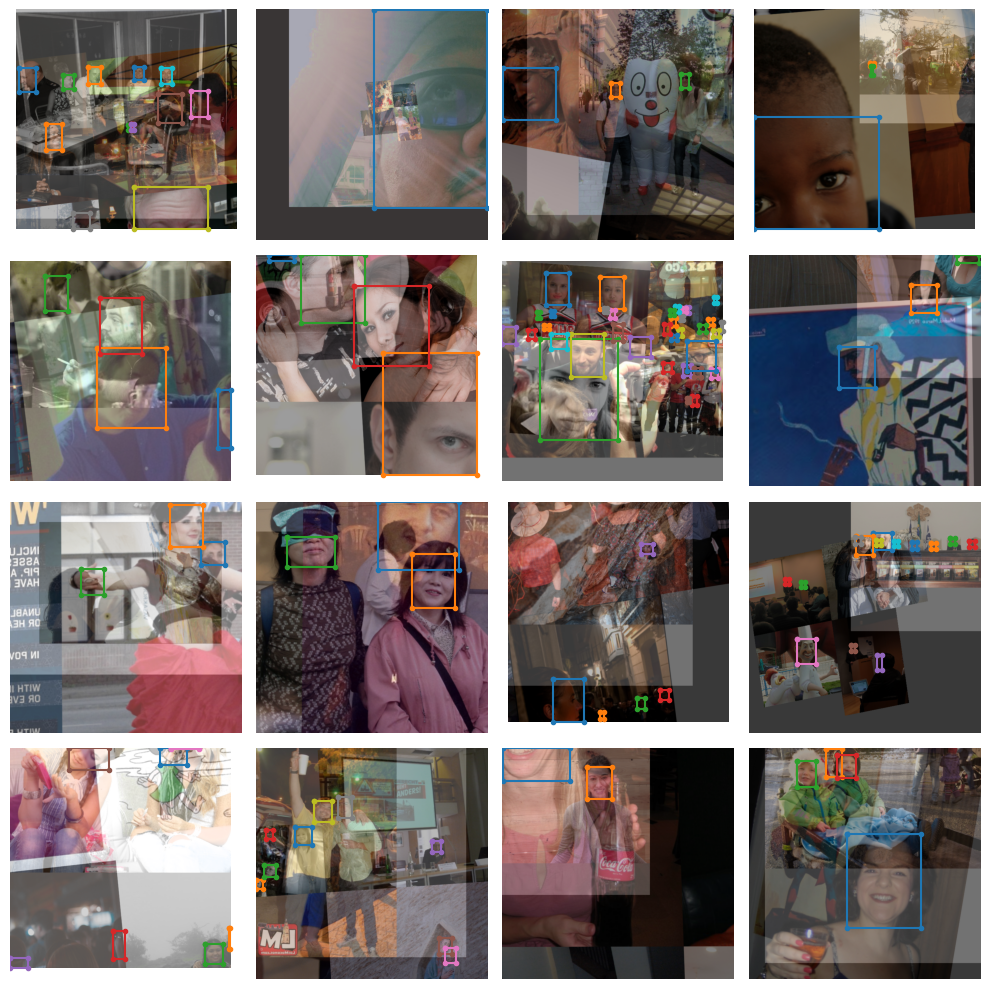

In [34]:
train_data.dataset.plot()

In [35]:
model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-11-24 16:48:10] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:01<00:00, 240MB/s]
[2023-11-24 16:48:12] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [45]:
# Ajustando a taxa de aprendizado inicial e outros parâmetros de otimização
train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 5, # Aumentei para mais épocas de warmup para um ajuste mais suave
    "initial_lr": 1e-3, # Reduzi um pouco a taxa de aprendizado inicial para uma convergência mais estável
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "AdamW", # Alterei essa configuração
    "optimizer_params": {"weight_decay": 0.0001}, # Ajustar o peso da regularização L2 (weight decay) - Mantive
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9999, "decay_type": "threshold"}, # Ajustei parâmetros do EMA para um ajuste mais suave
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16 # Mantive pq alterando para maior o treinamento não seguia
        ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.5, # # Reduzi a threshold do NMS para uma detecção mais suave e aumentar a detecção de objetos menores


            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}



In [46]:
trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)


In [47]:
try:
    trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)
except Exception as e:
    print(f"Ocorreu um erro durante o treinamento: {e}")

[2023-11-24 16:57:22] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231124_165722_632294`
[2023-11-24 16:57:22] INFO - sg_trainer.py - Checkpoints directory: /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294
[2023-11-24 16:57:22] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9999, 'decay_type': 'threshold'}


The console stream is now moved to /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/console_Nov24_16_57_22.txt


/usr/local/lib/python3.10/dist-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/optimizer_utils.py:107: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
  warnings.warn(
[2023-11-24 16:57:24] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.1295
│   ├── Ppyoloeloss/loss_iou = 0.8024
│   ├── Ppyoloeloss/loss_dfl = 0.7828
│   └── Ppyoloeloss/loss = 3.7147
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.1405
    ├── Ppyoloeloss/loss_iou = 0.6493
    ├── Ppyoloeloss/loss_dfl = 0.7018
    ├── Ppyoloeloss/loss = 3.4916
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.018
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 263/263 [01:46<00:00,  2.47it/s]
[2023-11-24 17:11:04] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 17:11:04] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7769914269447327


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9448
│   │   ├── Epoch N-1      = 2.1295 (↘ -1.1848)
│   │   └── Best until now = 2.1295 (↘ -1.1848)
│   ├── Ppyoloeloss/loss_iou = 0.5814
│   │   ├── Epoch N-1      = 0.8024 (↘ -0.221)
│   │   └── Best until now = 0.8024 (↘ -0.221)
│   ├── Ppyoloeloss/loss_dfl = 0.5623
│   │   ├── Epoch N-1      = 0.7828 (↘ -0.2205)
│   │   └── Best until now = 0.7828 (↘ -0.2205)
│   └── Ppyoloeloss/loss = 2.0885
│       ├── Epoch N-1      = 3.7147 (↘ -1.6262)
│       └── Best until now = 3.7147 (↘ -1.6262)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7641
    │   ├── Epoch N-1      = 2.1405 (↘ -1.3764)
    │   └── Best until now = 2.1405 (↘ -1.3764)
    ├── Ppyoloeloss/loss_iou = 0.4812
    │   ├── Epoch N-1      = 0.6493 (↘ -0.1681)
    │   └── Best until now = 0.6493 (↘ -0.1681)
    ├── Ppyoloeloss/loss_dfl = 0.4814
    │   ├── Epoch N-1      = 0.7018 (↘ -0.2204)
    │   └── Best until now = 0.7018 (↘ -0.2204)
    ├── Ppyoloeloss/loss

Validating epoch 2: 100%|██████████| 263/263 [01:45<00:00,  2.49it/s]
[2023-11-24 17:18:00] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 17:18:00] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.792813241481781


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9044
│   │   ├── Epoch N-1      = 0.9448 (↘ -0.0403)
│   │   └── Best until now = 0.9448 (↘ -0.0403)
│   ├── Ppyoloeloss/loss_iou = 0.5719
│   │   ├── Epoch N-1      = 0.5814 (↘ -0.0094)
│   │   └── Best until now = 0.5814 (↘ -0.0094)
│   ├── Ppyoloeloss/loss_dfl = 0.5584
│   │   ├── Epoch N-1      = 0.5623 (↘ -0.0039)
│   │   └── Best until now = 0.5623 (↘ -0.0039)
│   └── Ppyoloeloss/loss = 2.0348
│       ├── Epoch N-1      = 2.0885 (↘ -0.0537)
│       └── Best until now = 2.0885 (↘ -0.0537)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7371
    │   ├── Epoch N-1      = 0.7641 (↘ -0.0269)
    │   └── Best until now = 0.7641 (↘ -0.0269)
    ├── Ppyoloeloss/loss_iou = 0.4636
    │   ├── Epoch N-1      = 0.4812 (↘ -0.0176)
    │   └── Best until now = 0.4812 (↘ -0.0176)
    ├── Ppyoloeloss/loss_dfl = 0.4708
    │   ├── Epoch N-1      = 0.4814 (↘ -0.0107)
    │   └── Best until now = 0.4814 (↘ -0.0107)
    ├── Ppyoloeloss/lo

Validating epoch 3: 100%|██████████| 263/263 [01:45<00:00,  2.49it/s]
[2023-11-24 17:24:53] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 17:24:53] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7998895645141602


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8977
│   │   ├── Epoch N-1      = 0.9044 (↘ -0.0067)
│   │   └── Best until now = 0.9044 (↘ -0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.5741
│   │   ├── Epoch N-1      = 0.5719 (↗ 0.0022)
│   │   └── Best until now = 0.5719 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.5599
│   │   ├── Epoch N-1      = 0.5584 (↗ 0.0015)
│   │   └── Best until now = 0.5584 (↗ 0.0015)
│   └── Ppyoloeloss/loss = 2.0317
│       ├── Epoch N-1      = 2.0348 (↘ -0.003)
│       └── Best until now = 2.0348 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7385
    │   ├── Epoch N-1      = 0.7371 (↗ 0.0014)
    │   └── Best until now = 0.7371 (↗ 0.0014)
    ├── Ppyoloeloss/loss_iou = 0.4709
    │   ├── Epoch N-1      = 0.4636 (↗ 0.0073)
    │   └── Best until now = 0.4636 (↗ 0.0073)
    ├── Ppyoloeloss/loss_dfl = 0.4746
    │   ├── Epoch N-1      = 0.4708 (↗ 0.0038)
    │   └── Best until now = 0.4708 (↗ 0.0038)
    ├── Ppyoloeloss/loss = 1.684
 

Validating epoch 4: 100%|██████████| 263/263 [01:45<00:00,  2.49it/s]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8988
│   │   ├── Epoch N-1      = 0.8977 (↗ 0.0011)
│   │   └── Best until now = 0.8977 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.5789
│   │   ├── Epoch N-1      = 0.5741 (↗ 0.0047)
│   │   └── Best until now = 0.5719 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.5586
│   │   ├── Epoch N-1      = 0.5599 (↘ -0.0013)
│   │   └── Best until now = 0.5584 (↗ 0.0002)
│   └── Ppyoloeloss/loss = 2.0363
│       ├── Epoch N-1      = 2.0317 (↗ 0.0045)
│       └── Best until now = 2.0317 (↗ 0.0045)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7537
    │   ├── Epoch N-1      = 0.7385 (↗ 0.0152)
    │   └── Best until now = 0.7371 (↗ 0.0166)
    ├── Ppyoloeloss/loss_iou = 0.468
    │   ├── Epoch N-1      = 0.4709 (↘ -0.0028)
    │   └── Best until now = 0.4636 (↗ 0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.4731
    │   ├── Epoch N-1      = 0.4746 (↘ -0.0015)
    │   └── Best until now = 0.4708 (↗ 0.0023)
    ├── Ppyoloeloss/loss = 1.6948


Validating epoch 5: 100%|██████████| 263/263 [01:44<00:00,  2.52it/s]
[2023-11-24 17:38:39] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 17:38:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8001863360404968


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.891
│   │   ├── Epoch N-1      = 0.8988 (↘ -0.0078)
│   │   └── Best until now = 0.8977 (↘ -0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.5718
│   │   ├── Epoch N-1      = 0.5789 (↘ -0.007)
│   │   └── Best until now = 0.5719 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.5597
│   │   ├── Epoch N-1      = 0.5586 (↗ 0.0012)
│   │   └── Best until now = 0.5584 (↗ 0.0013)
│   └── Ppyoloeloss/loss = 2.0226
│       ├── Epoch N-1      = 2.0363 (↘ -0.0137)
│       └── Best until now = 2.0317 (↘ -0.0092)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.752
    │   ├── Epoch N-1      = 0.7537 (↘ -0.0017)
    │   └── Best until now = 0.7371 (↗ 0.0148)
    ├── Ppyoloeloss/loss_iou = 0.4684
    │   ├── Epoch N-1      = 0.468  (↗ 0.0003)
    │   └── Best until now = 0.4636 (↗ 0.0047)
    ├── Ppyoloeloss/loss_dfl = 0.477
    │   ├── Epoch N-1      = 0.4731 (↗ 0.0039)
    │   └── Best until now = 0.4708 (↗ 0.0062)
    ├── Ppyoloeloss/loss = 1.6973


Validating epoch 6: 100%|██████████| 263/263 [01:43<00:00,  2.54it/s]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8823
│   │   ├── Epoch N-1      = 0.891  (↘ -0.0087)
│   │   └── Best until now = 0.891  (↘ -0.0087)
│   ├── Ppyoloeloss/loss_iou = 0.5594
│   │   ├── Epoch N-1      = 0.5718 (↘ -0.0124)
│   │   └── Best until now = 0.5718 (↘ -0.0124)
│   ├── Ppyoloeloss/loss_dfl = 0.5491
│   │   ├── Epoch N-1      = 0.5597 (↘ -0.0106)
│   │   └── Best until now = 0.5584 (↘ -0.0093)
│   └── Ppyoloeloss/loss = 1.9908
│       ├── Epoch N-1      = 2.0226 (↘ -0.0318)
│       └── Best until now = 2.0226 (↘ -0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7421
    │   ├── Epoch N-1      = 0.752  (↘ -0.0098)
    │   └── Best until now = 0.7371 (↗ 0.005)
    ├── Ppyoloeloss/loss_iou = 0.4681
    │   ├── Epoch N-1      = 0.4684 (↘ -0.0003)
    │   └── Best until now = 0.4636 (↗ 0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.4765
    │   ├── Epoch N-1      = 0.477  (↘ -0.0005)
    │   └── Best until now = 0.4708 (↗ 0.0057)
    ├── Ppyoloeloss/loss =

Validating epoch 7: 100%|██████████| 263/263 [01:44<00:00,  2.51it/s]
[2023-11-24 17:52:54] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 17:52:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8054960370063782


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8737
│   │   ├── Epoch N-1      = 0.8823 (↘ -0.0085)
│   │   └── Best until now = 0.8823 (↘ -0.0085)
│   ├── Ppyoloeloss/loss_iou = 0.5557
│   │   ├── Epoch N-1      = 0.5594 (↘ -0.0037)
│   │   └── Best until now = 0.5594 (↘ -0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.5402
│   │   ├── Epoch N-1      = 0.5491 (↘ -0.0089)
│   │   └── Best until now = 0.5491 (↘ -0.0089)
│   └── Ppyoloeloss/loss = 1.9696
│       ├── Epoch N-1      = 1.9908 (↘ -0.0212)
│       └── Best until now = 1.9908 (↘ -0.0212)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.732
    │   ├── Epoch N-1      = 0.7421 (↘ -0.0101)
    │   └── Best until now = 0.7371 (↘ -0.0051)
    ├── Ppyoloeloss/loss_iou = 0.4682
    │   ├── Epoch N-1      = 0.4681 (↗ 1e-04)
    │   └── Best until now = 0.4636 (↗ 0.0046)
    ├── Ppyoloeloss/loss_dfl = 0.474
    │   ├── Epoch N-1      = 0.4765 (↘ -0.0025)
    │   └── Best until now = 0.4708 (↗ 0.0032)
    ├── Ppyoloeloss/loss = 1

Validating epoch 8: 100%|██████████| 263/263 [01:42<00:00,  2.57it/s]
[2023-11-24 17:59:59] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 17:59:59] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8142679333686829


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8631
│   │   ├── Epoch N-1      = 0.8737 (↘ -0.0106)
│   │   └── Best until now = 0.8737 (↘ -0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.5475
│   │   ├── Epoch N-1      = 0.5557 (↘ -0.0082)
│   │   └── Best until now = 0.5557 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.5301
│   │   ├── Epoch N-1      = 0.5402 (↘ -0.0101)
│   │   └── Best until now = 0.5402 (↘ -0.0101)
│   └── Ppyoloeloss/loss = 1.9406
│       ├── Epoch N-1      = 1.9696 (↘ -0.029)
│       └── Best until now = 1.9696 (↘ -0.029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7242
    │   ├── Epoch N-1      = 0.732  (↘ -0.0079)
    │   └── Best until now = 0.732  (↘ -0.0079)
    ├── Ppyoloeloss/loss_iou = 0.4693
    │   ├── Epoch N-1      = 0.4682 (↗ 0.0012)
    │   └── Best until now = 0.4636 (↗ 0.0057)
    ├── Ppyoloeloss/loss_dfl = 0.4719
    │   ├── Epoch N-1      = 0.474  (↘ -0.002)
    │   └── Best until now = 0.4708 (↗ 0.0011)
    ├── Ppyoloeloss/loss = 1

Validating epoch 9: 100%|██████████| 263/263 [01:42<00:00,  2.55it/s]
[2023-11-24 18:07:14] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:07:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8203005790710449


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8449
│   │   ├── Epoch N-1      = 0.8631 (↘ -0.0182)
│   │   └── Best until now = 0.8631 (↘ -0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.5369
│   │   ├── Epoch N-1      = 0.5475 (↘ -0.0105)
│   │   └── Best until now = 0.5475 (↘ -0.0105)
│   ├── Ppyoloeloss/loss_dfl = 0.5243
│   │   ├── Epoch N-1      = 0.5301 (↘ -0.0057)
│   │   └── Best until now = 0.5301 (↘ -0.0057)
│   └── Ppyoloeloss/loss = 1.9062
│       ├── Epoch N-1      = 1.9406 (↘ -0.0345)
│       └── Best until now = 1.9406 (↘ -0.0345)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7145
    │   ├── Epoch N-1      = 0.7242 (↘ -0.0097)
    │   └── Best until now = 0.7242 (↘ -0.0097)
    ├── Ppyoloeloss/loss_iou = 0.4664
    │   ├── Epoch N-1      = 0.4693 (↘ -0.0029)
    │   └── Best until now = 0.4636 (↗ 0.0028)
    ├── Ppyoloeloss/loss_dfl = 0.4678
    │   ├── Epoch N-1      = 0.4719 (↘ -0.0041)
    │   └── Best until now = 0.4708 (↘ -0.003)
    ├── Ppyoloeloss/loss

Validating epoch 10: 100%|██████████| 263/263 [01:43<00:00,  2.54it/s]
[2023-11-24 18:15:24] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:15:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8227490186691284


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8339
│   │   ├── Epoch N-1      = 0.8449 (↘ -0.011)
│   │   └── Best until now = 0.8449 (↘ -0.011)
│   ├── Ppyoloeloss/loss_iou = 0.5286
│   │   ├── Epoch N-1      = 0.5369 (↘ -0.0083)
│   │   └── Best until now = 0.5369 (↘ -0.0083)
│   ├── Ppyoloeloss/loss_dfl = 0.5191
│   │   ├── Epoch N-1      = 0.5243 (↘ -0.0052)
│   │   └── Best until now = 0.5243 (↘ -0.0052)
│   └── Ppyoloeloss/loss = 1.8816
│       ├── Epoch N-1      = 1.9062 (↘ -0.0246)
│       └── Best until now = 1.9062 (↘ -0.0246)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7157
    │   ├── Epoch N-1      = 0.7145 (↗ 0.0012)
    │   └── Best until now = 0.7145 (↗ 0.0012)
    ├── Ppyoloeloss/loss_iou = 0.4672
    │   ├── Epoch N-1      = 0.4664 (↗ 0.0008)
    │   └── Best until now = 0.4636 (↗ 0.0036)
    ├── Ppyoloeloss/loss_dfl = 0.4678
    │   ├── Epoch N-1      = 0.4678 (↗ 0.0)
    │   └── Best until now = 0.4678 (↗ 0.0)
    ├── Ppyoloeloss/loss = 1.6507
 

Validating epoch 11: 100%|██████████| 263/263 [01:43<00:00,  2.53it/s]
[2023-11-24 18:23:09] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:23:09] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8267184495925903


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8324
│   │   ├── Epoch N-1      = 0.8339 (↘ -0.0015)
│   │   └── Best until now = 0.8339 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.5207
│   │   ├── Epoch N-1      = 0.5286 (↘ -0.008)
│   │   └── Best until now = 0.5286 (↘ -0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.5104
│   │   ├── Epoch N-1      = 0.5191 (↘ -0.0087)
│   │   └── Best until now = 0.5191 (↘ -0.0087)
│   └── Ppyoloeloss/loss = 1.8635
│       ├── Epoch N-1      = 1.8816 (↘ -0.0181)
│       └── Best until now = 1.8816 (↘ -0.0181)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7073
    │   ├── Epoch N-1      = 0.7157 (↘ -0.0083)
    │   └── Best until now = 0.7145 (↘ -0.0071)
    ├── Ppyoloeloss/loss_iou = 0.4656
    │   ├── Epoch N-1      = 0.4672 (↘ -0.0016)
    │   └── Best until now = 0.4636 (↗ 0.002)
    ├── Ppyoloeloss/loss_dfl = 0.4659
    │   ├── Epoch N-1      = 0.4678 (↘ -0.0019)
    │   └── Best until now = 0.4678 (↘ -0.0019)
    ├── Ppyoloeloss/loss 

Validating epoch 12: 100%|██████████| 263/263 [01:43<00:00,  2.55it/s]
[2023-11-24 18:30:39] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:30:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8287422060966492


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8218
│   │   ├── Epoch N-1      = 0.8324 (↘ -0.0106)
│   │   └── Best until now = 0.8324 (↘ -0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.519
│   │   ├── Epoch N-1      = 0.5207 (↘ -0.0016)
│   │   └── Best until now = 0.5207 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.5082
│   │   ├── Epoch N-1      = 0.5104 (↘ -0.0022)
│   │   └── Best until now = 0.5104 (↘ -0.0022)
│   └── Ppyoloeloss/loss = 1.849
│       ├── Epoch N-1      = 1.8635 (↘ -0.0145)
│       └── Best until now = 1.8635 (↘ -0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7035
    │   ├── Epoch N-1      = 0.7073 (↘ -0.0039)
    │   └── Best until now = 0.7073 (↘ -0.0039)
    ├── Ppyoloeloss/loss_iou = 0.4624
    │   ├── Epoch N-1      = 0.4656 (↘ -0.0032)
    │   └── Best until now = 0.4636 (↘ -0.0012)
    ├── Ppyoloeloss/loss_dfl = 0.462
    │   ├── Epoch N-1      = 0.4659 (↘ -0.0039)
    │   └── Best until now = 0.4659 (↘ -0.0039)
    ├── Ppyoloeloss/loss

Validating epoch 13: 100%|██████████| 263/263 [01:43<00:00,  2.54it/s]
[2023-11-24 18:38:15] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:38:15] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8321586847305298


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8002
│   │   ├── Epoch N-1      = 0.8218 (↘ -0.0216)
│   │   └── Best until now = 0.8218 (↘ -0.0216)
│   ├── Ppyoloeloss/loss_iou = 0.5103
│   │   ├── Epoch N-1      = 0.519  (↘ -0.0087)
│   │   └── Best until now = 0.519  (↘ -0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.5038
│   │   ├── Epoch N-1      = 0.5082 (↘ -0.0044)
│   │   └── Best until now = 0.5082 (↘ -0.0044)
│   └── Ppyoloeloss/loss = 1.8143
│       ├── Epoch N-1      = 1.849  (↘ -0.0346)
│       └── Best until now = 1.849  (↘ -0.0346)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6992
    │   ├── Epoch N-1      = 0.7035 (↘ -0.0042)
    │   └── Best until now = 0.7035 (↘ -0.0042)
    ├── Ppyoloeloss/loss_iou = 0.4591
    │   ├── Epoch N-1      = 0.4624 (↘ -0.0033)
    │   └── Best until now = 0.4624 (↘ -0.0033)
    ├── Ppyoloeloss/loss_dfl = 0.4594
    │   ├── Epoch N-1      = 0.462  (↘ -0.0026)
    │   └── Best until now = 0.462  (↘ -0.0026)
    ├── Ppyoloeloss/l

Validating epoch 14: 100%|██████████| 263/263 [01:44<00:00,  2.53it/s]
[2023-11-24 18:46:04] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:46:04] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8334455490112305


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7977
│   │   ├── Epoch N-1      = 0.8002 (↘ -0.0025)
│   │   └── Best until now = 0.8002 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.5028
│   │   ├── Epoch N-1      = 0.5103 (↘ -0.0075)
│   │   └── Best until now = 0.5103 (↘ -0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.4935
│   │   ├── Epoch N-1      = 0.5038 (↘ -0.0103)
│   │   └── Best until now = 0.5038 (↘ -0.0103)
│   └── Ppyoloeloss/loss = 1.7941
│       ├── Epoch N-1      = 1.8143 (↘ -0.0202)
│       └── Best until now = 1.8143 (↘ -0.0202)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6969
    │   ├── Epoch N-1      = 0.6992 (↘ -0.0024)
    │   └── Best until now = 0.6992 (↘ -0.0024)
    ├── Ppyoloeloss/loss_iou = 0.4599
    │   ├── Epoch N-1      = 0.4591 (↗ 0.0008)
    │   └── Best until now = 0.4591 (↗ 0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.458
    │   ├── Epoch N-1      = 0.4594 (↘ -0.0014)
    │   └── Best until now = 0.4594 (↘ -0.0014)
    ├── Ppyoloeloss/loss

Validating epoch 15: 100%|██████████| 263/263 [01:44<00:00,  2.51it/s]
[2023-11-24 18:53:49] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 18:53:49] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8354162573814392


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7884
│   │   ├── Epoch N-1      = 0.7977 (↘ -0.0093)
│   │   └── Best until now = 0.7977 (↘ -0.0093)
│   ├── Ppyoloeloss/loss_iou = 0.4998
│   │   ├── Epoch N-1      = 0.5028 (↘ -0.003)
│   │   └── Best until now = 0.5028 (↘ -0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.4889
│   │   ├── Epoch N-1      = 0.4935 (↘ -0.0047)
│   │   └── Best until now = 0.4935 (↘ -0.0047)
│   └── Ppyoloeloss/loss = 1.7771
│       ├── Epoch N-1      = 1.7941 (↘ -0.017)
│       └── Best until now = 1.7941 (↘ -0.017)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.693
    │   ├── Epoch N-1      = 0.6969 (↘ -0.0039)
    │   └── Best until now = 0.6969 (↘ -0.0039)
    ├── Ppyoloeloss/loss_iou = 0.4599
    │   ├── Epoch N-1      = 0.4599 (↘ -1e-04)
    │   └── Best until now = 0.4591 (↗ 0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.456
    │   ├── Epoch N-1      = 0.458  (↘ -0.002)
    │   └── Best until now = 0.458  (↘ -0.002)
    ├── Ppyoloeloss/loss = 1.60

Validating epoch 16: 100%|██████████| 263/263 [01:43<00:00,  2.54it/s]
[2023-11-24 19:01:41] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 19:01:41] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8404532074928284


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7819
│   │   ├── Epoch N-1      = 0.7884 (↘ -0.0065)
│   │   └── Best until now = 0.7884 (↘ -0.0065)
│   ├── Ppyoloeloss/loss_iou = 0.4872
│   │   ├── Epoch N-1      = 0.4998 (↘ -0.0127)
│   │   └── Best until now = 0.4998 (↘ -0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.4794
│   │   ├── Epoch N-1      = 0.4889 (↘ -0.0094)
│   │   └── Best until now = 0.4889 (↘ -0.0094)
│   └── Ppyoloeloss/loss = 1.7484
│       ├── Epoch N-1      = 1.7771 (↘ -0.0286)
│       └── Best until now = 1.7771 (↘ -0.0286)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6894
    │   ├── Epoch N-1      = 0.693  (↘ -0.0036)
    │   └── Best until now = 0.693  (↘ -0.0036)
    ├── Ppyoloeloss/loss_iou = 0.4574
    │   ├── Epoch N-1      = 0.4599 (↘ -0.0025)
    │   └── Best until now = 0.4591 (↘ -0.0017)
    ├── Ppyoloeloss/loss_dfl = 0.453
    │   ├── Epoch N-1      = 0.456  (↘ -0.003)
    │   └── Best until now = 0.456  (↘ -0.003)
    ├── Ppyoloeloss/loss

Validating epoch 17: 100%|██████████| 263/263 [01:44<00:00,  2.51it/s]
[2023-11-24 19:09:23] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 19:09:23] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8412114977836609


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7596
│   │   ├── Epoch N-1      = 0.7819 (↘ -0.0223)
│   │   └── Best until now = 0.7819 (↘ -0.0223)
│   ├── Ppyoloeloss/loss_iou = 0.4883
│   │   ├── Epoch N-1      = 0.4872 (↗ 0.0012)
│   │   └── Best until now = 0.4872 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.4724
│   │   ├── Epoch N-1      = 0.4794 (↘ -0.0071)
│   │   └── Best until now = 0.4794 (↘ -0.0071)
│   └── Ppyoloeloss/loss = 1.7203
│       ├── Epoch N-1      = 1.7484 (↘ -0.0281)
│       └── Best until now = 1.7484 (↘ -0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6881
    │   ├── Epoch N-1      = 0.6894 (↘ -0.0013)
    │   └── Best until now = 0.6894 (↘ -0.0013)
    ├── Ppyoloeloss/loss_iou = 0.4572
    │   ├── Epoch N-1      = 0.4574 (↘ -0.0002)
    │   └── Best until now = 0.4574 (↘ -0.0002)
    ├── Ppyoloeloss/loss_dfl = 0.451
    │   ├── Epoch N-1      = 0.453  (↘ -0.002)
    │   └── Best until now = 0.453  (↘ -0.002)
    ├── Ppyoloeloss/loss =

Validating epoch 18: 100%|██████████| 263/263 [01:44<00:00,  2.52it/s]
[2023-11-24 19:17:24] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 19:17:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8425651788711548


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7659
│   │   ├── Epoch N-1      = 0.7596 (↗ 0.0063)
│   │   └── Best until now = 0.7596 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.4869
│   │   ├── Epoch N-1      = 0.4883 (↘ -0.0014)
│   │   └── Best until now = 0.4872 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.4711
│   │   ├── Epoch N-1      = 0.4724 (↘ -0.0012)
│   │   └── Best until now = 0.4724 (↘ -0.0012)
│   └── Ppyoloeloss/loss = 1.724
│       ├── Epoch N-1      = 1.7203 (↗ 0.0037)
│       └── Best until now = 1.7203 (↗ 0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6854
    │   ├── Epoch N-1      = 0.6881 (↘ -0.0028)
    │   └── Best until now = 0.6881 (↘ -0.0028)
    ├── Ppyoloeloss/loss_iou = 0.4572
    │   ├── Epoch N-1      = 0.4572 (↘ -0.0)
    │   └── Best until now = 0.4572 (↘ -0.0)
    ├── Ppyoloeloss/loss_dfl = 0.4481
    │   ├── Epoch N-1      = 0.451  (↘ -0.0029)
    │   └── Best until now = 0.451  (↘ -0.0029)
    ├── Ppyoloeloss/loss = 1.590

Validating epoch 19: 100%|██████████| 263/263 [01:44<00:00,  2.51it/s]
[2023-11-24 19:25:11] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth
[2023-11-24 19:25:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8455432653427124


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7512
│   │   ├── Epoch N-1      = 0.7659 (↘ -0.0147)
│   │   └── Best until now = 0.7596 (↘ -0.0085)
│   ├── Ppyoloeloss/loss_iou = 0.4759
│   │   ├── Epoch N-1      = 0.4869 (↘ -0.011)
│   │   └── Best until now = 0.4869 (↘ -0.011)
│   ├── Ppyoloeloss/loss_dfl = 0.4641
│   │   ├── Epoch N-1      = 0.4711 (↘ -0.0071)
│   │   └── Best until now = 0.4711 (↘ -0.0071)
│   └── Ppyoloeloss/loss = 1.6912
│       ├── Epoch N-1      = 1.724  (↘ -0.0328)
│       └── Best until now = 1.7203 (↘ -0.0291)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6841
    │   ├── Epoch N-1      = 0.6854 (↘ -0.0013)
    │   └── Best until now = 0.6854 (↘ -0.0013)
    ├── Ppyoloeloss/loss_iou = 0.4562
    │   ├── Epoch N-1      = 0.4572 (↘ -0.001)
    │   └── Best until now = 0.4572 (↘ -0.001)
    ├── Ppyoloeloss/loss_dfl = 0.4457
    │   ├── Epoch N-1      = 0.4481 (↘ -0.0024)
    │   └── Best until now = 0.4481 (↘ -0.0024)
    ├── Ppyoloeloss/loss 

[2023-11-24 19:26:36] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 20: 100%|██████████| 263/263 [01:44<00:00,  2.51it/s]
[2023-11-24 19:28:22] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


In [48]:
checkpoint_file = os.path.join(CHECKPOINT_DIR, EXPERIMENT_NAME, 'RUN_20231124_165722_632294/ckpt_best.pth')


In [49]:
if os.path.exists(checkpoint_file):
    best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=checkpoint_file
).to(DEVICE)
else:
    print(f"O arquivo de checkpoint não foi encontrado: {checkpoint_file}")

[2023-11-24 19:34:17] INFO - checkpoint_utils.py - Successfully loaded model weights from /kaggle/working/yolo_nas_face/RUN_20231124_165722_632294/ckpt_best.pth EMA checkpoint.


[2023-11-24 19:37:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


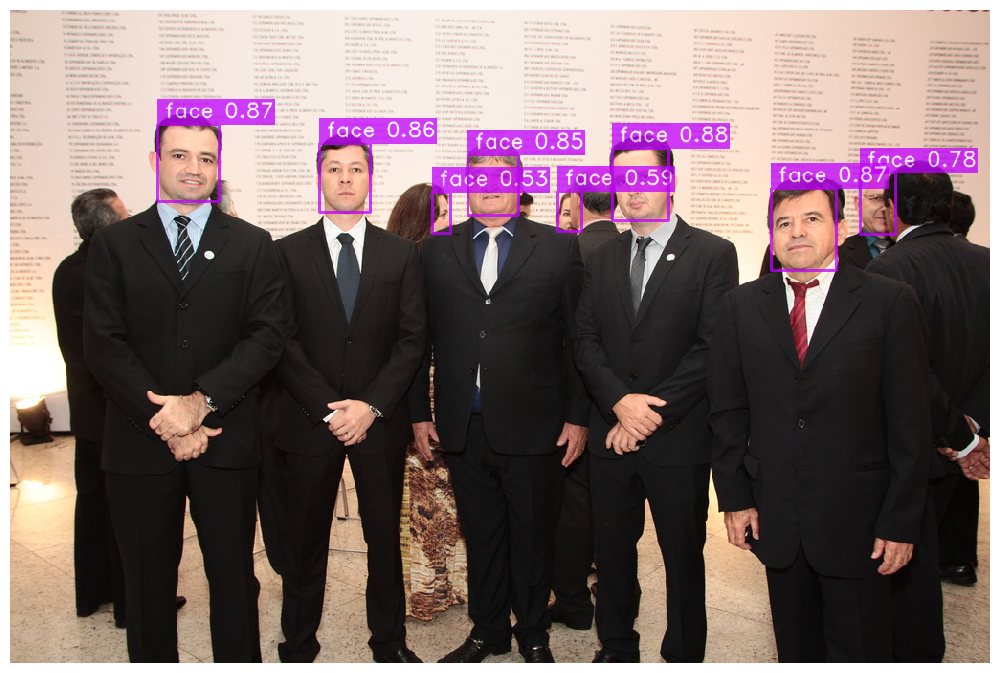

In [54]:
img_1 = "/content/dataset/images/train_subset/078e862e8f9d98e2.jpg"
best_model.predict(img_1).show()

[2023-11-24 19:37:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


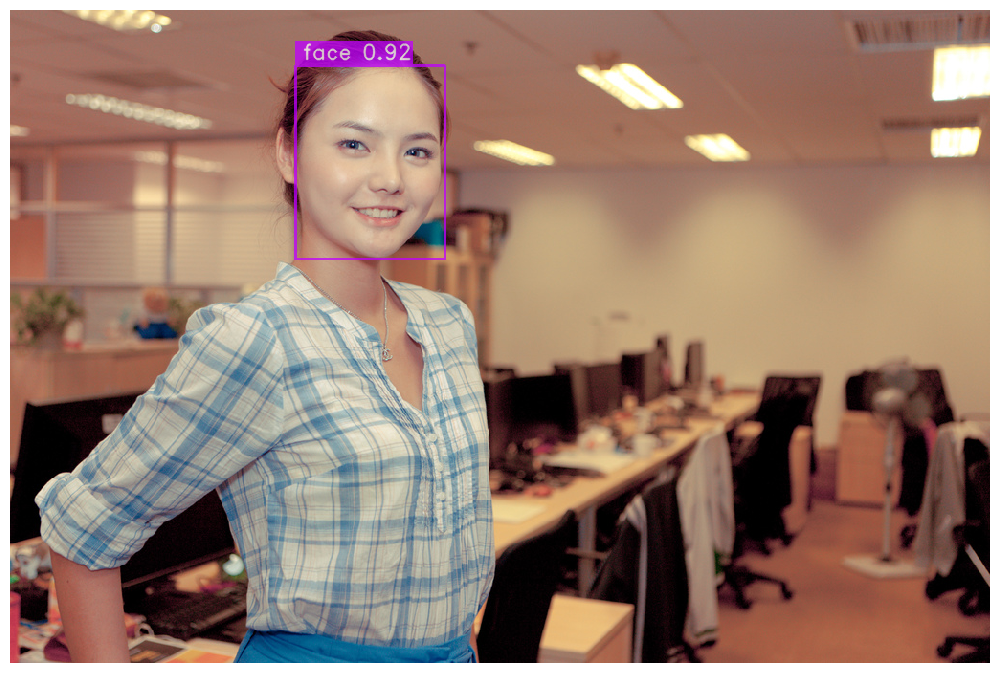

In [55]:
img_2 = "/content/dataset/images/train_subset/0b59c1792aa02e50.jpg"
best_model.predict(img_2).show()

[2023-11-24 19:37:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


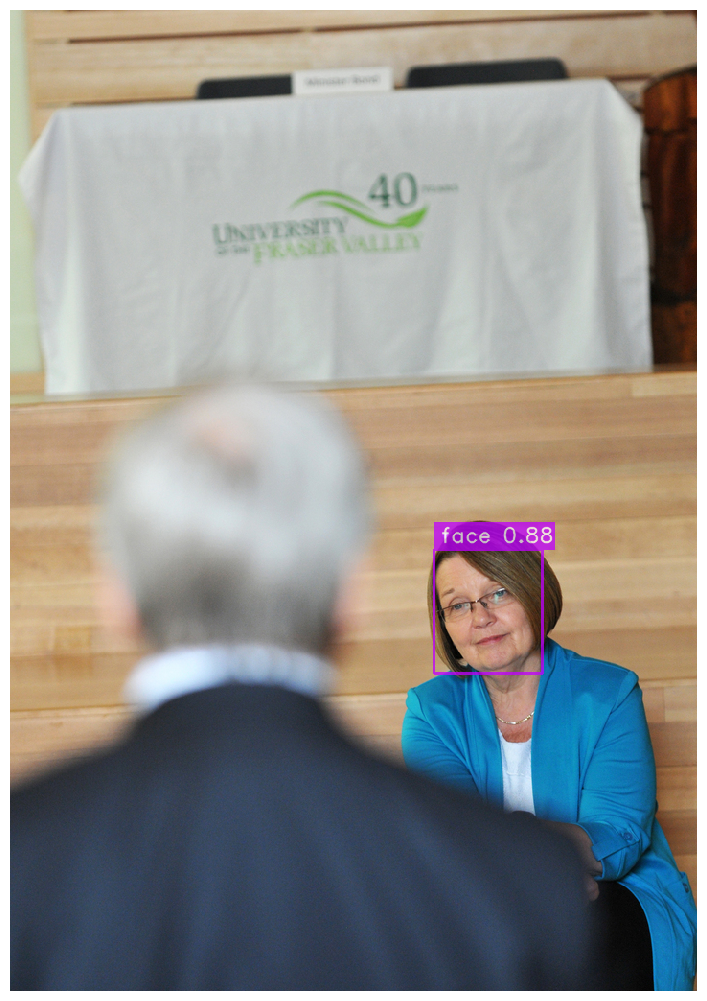

In [56]:
img_3 = "/content/dataset/images/train_subset/13071d75170b4f0f.jpg"
best_model.predict(img_3).show()

[2023-11-24 19:34:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/visualization/utils.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("gist_rainbow", num_classes)


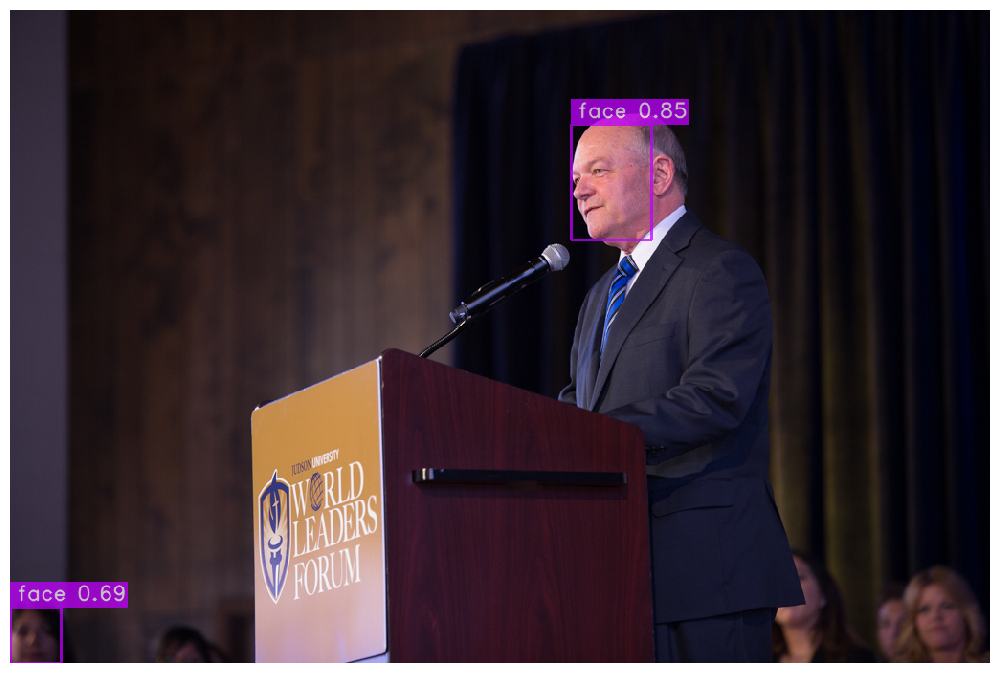

In [53]:
img_4 = "/content/dataset/images/train_subset/08a971e682812e61.jpg"
best_model.predict(img_4).show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[2023-11-24 19:39:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/visualization/utils.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("gist_rainbow", num_classes)


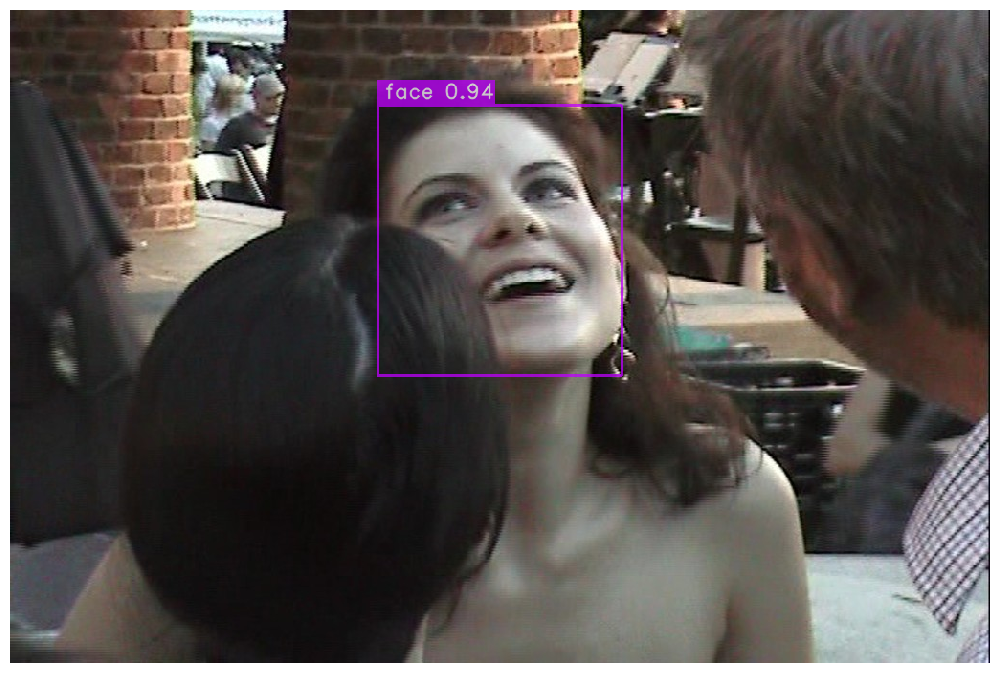

In [57]:
img_5 = "/content/dataset/images/train_subset/1a291df99888d4dd.jpg"
best_model.predict(img_5).show()